In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
redWineURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
whiteWineURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [4]:
red = pd.read_csv(redWineURL, sep=";"); red['type'] = 0
white = pd.read_csv(whiteWineURL, sep=";"); white['type'] = 1
wine = pd.concat([red, white])

In [5]:
print(wine.shape)
wine.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<AxesSubplot: >

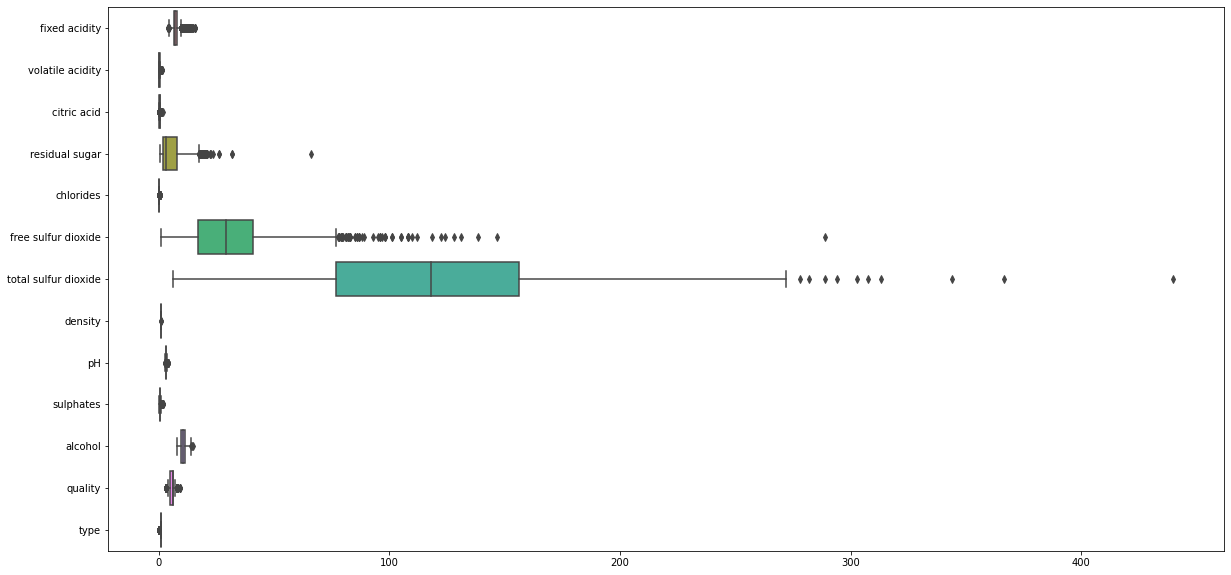

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot(data=wine, orient="h")

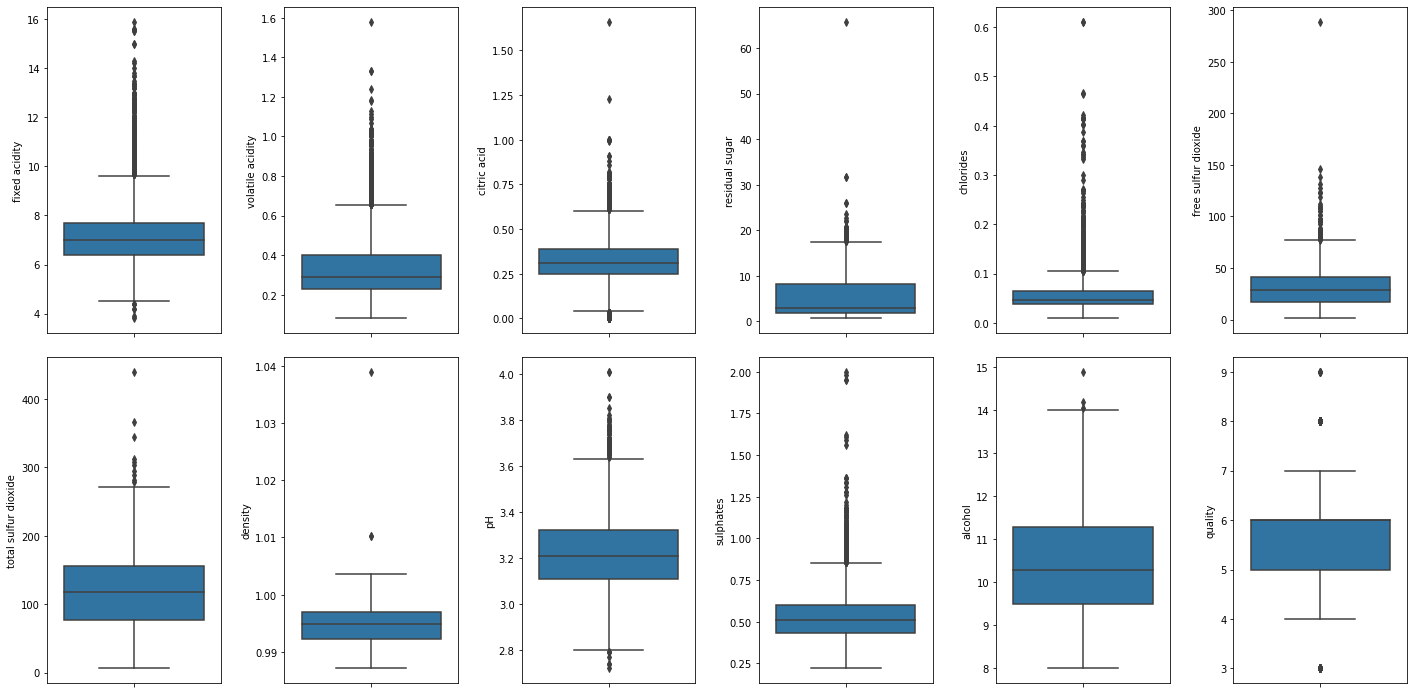

In [9]:
# independence variable boxplot
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(25, 15))
index = 0
axs = axs.flatten()

for val_name, val_data in wine.items():
    sns.boxplot(y=val_name, data=wine, ax=axs[index])
    index = index + 1
    if index == 12 : 
        break
    
plt.tight_layout(pad=20, w_pad=2, h_pad=2)

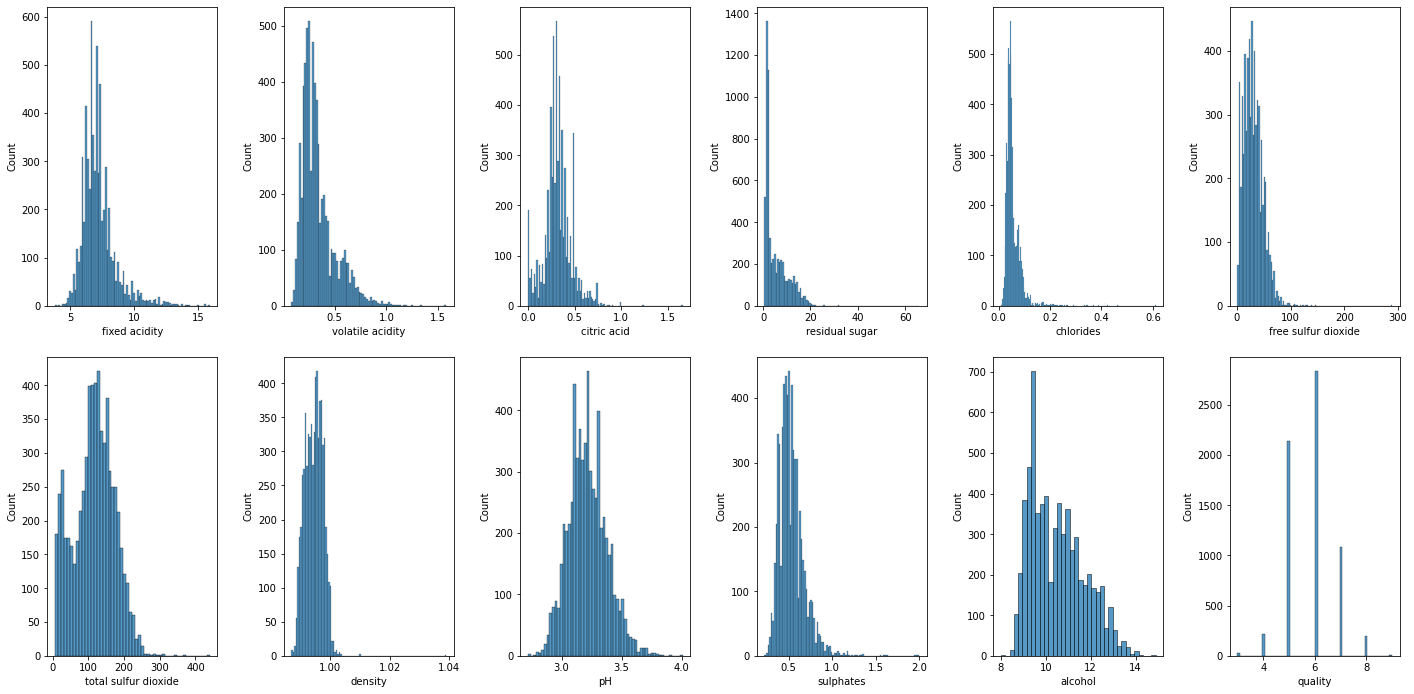

In [10]:
# independence variable visualization
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(25,15))
index = 0
axs = axs.flatten()

for val_name, val_data in wine.items() :
    sns.histplot(data=wine[val_name], ax=axs[index])
    index = index + 1
    if index == 12 :
        break

plt.tight_layout(pad=20, w_pad=2, h_pad=2)

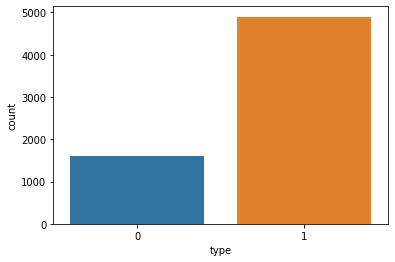

1    4898
0    1599
Name: type, dtype: int64


In [11]:
# target variable visualization
sns.countplot(data=wine, x="type")
plt.show()
print(wine["type"].value_counts())

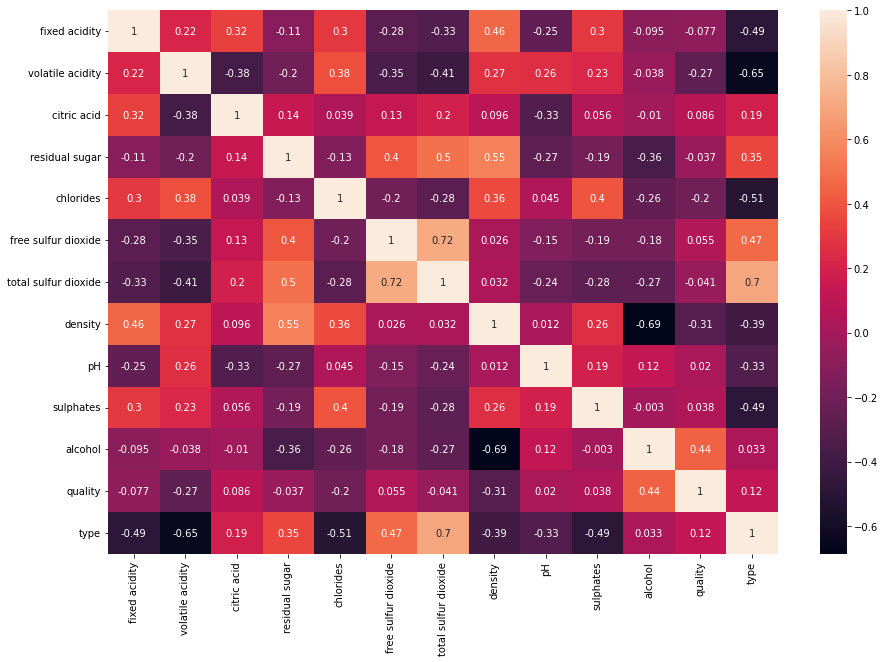

In [24]:
# Correlation Visualization
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), annot=True)
plt.show()

In [12]:
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler().fit(wine)
wine_normal = sc.transform(wine)

In [13]:
pd.DataFrame(wine_normal)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0


In [14]:
from sklearn.model_selection import train_test_split
X = wine_normal[:, :-1]
Y = wine_normal[:, -1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [15]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_shape=(12,)),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=2, activation="softmax")])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,474
Trainable params: 3,474
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(train_x, train_y, epochs=50, batch_size=128, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")])

Epoch 1/50
33/33 [==============================] - 1s 14ms/step - loss: 0.2440 - accuracy: 0.8723 - val_loss: 0.2706 - val_accuracy: 0.9115
Epoch 2/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1036 - accuracy: 0.9694 - val_loss: 0.0511 - val_accuracy: 0.9837
Epoch 3/50
33/33 [==============================] - 0s 11ms/step - loss: 0.0452 - accuracy: 0.9889 - val_loss: 0.0490 - val_accuracy: 0.9875
Epoch 4/50
33/33 [==============================] - 0s 11ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.0452 - val_accuracy: 0.9894
Epoch 5/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0382 - accuracy: 0.9901 - val_loss: 0.0643 - val_accuracy: 0.9808
Epoch 6/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0444 - val_accuracy: 0.9913
Epoch 7/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9930 - val_loss: 0.0453 - val_accuracy: 0.9894
Epoch 8/50
33

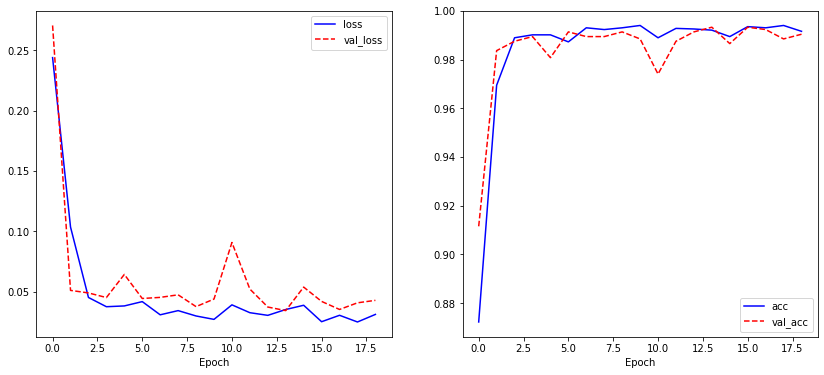

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [19]:
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9931


[0.028500838205218315, 0.9930769205093384]

In [20]:
pred = model.predict(test_x, verbose=0)
pred = pred.argmax(axis=-1)
real = test_y.argmax(axis=-1)

In [23]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(real, pred)
print(confusion_matrix)

[[ 284    3]
 [   6 1007]]


In [25]:
(284+1007) / (284+3+6+1007)

0.9930769230769231